In [44]:
import pandas as pd

In [85]:
df = pd.read_excel('/content/지역 유통 (판매) 데이터_ 물류센터-소매점 판매 데이터(필수).xlsx', sheet_name='데이터')
df.head()

,판매일,구분,우편번호,판매수량,옵션코드,규격,입수,상품 바코드,상품명,Unnamed: 9,Unnamed: 10
0,2021-01-04,매출,37542,4,EA,100g*1,1,8.801007e+12,다시다)쇠골드명품100g,NaN,NaN
1,2021-01-04,매출,37542,2,BX,12입,12,1.880104e+13,사조]해표식용유<1.8L>,NaN,NaN
2,2021-01-04,매출,37542,1,EA,1입,1,8.809199e+12,젓가락]키친센스 나무<250p>,NaN,NaN
3,2021-01-04,매출,37542,1,EA,50g*16*1,1,8.801077e+12,소세지 천하장사800g,NaN,NaN
4,2021-01-04,매출,37542,3,EA,10입,1,8.801045e+12,오뚜기]옛날자른당면<1kg >,NaN,NaN


In [46]:
# 옵션코드 = EA 최소단위 / CS 묶음단위 / BX 박스단위
# 입수 = 해당 옵션코드에 상품이 들어있는 EA 수량

In [86]:
print(min(df['판매일']))
print(max(df['판매일']))

2021-01-04 00:00:00
2022-07-01 00:00:00


In [87]:
df['구분'].value_counts()

매출    508839
반품     13156
Name: 구분, dtype: int64

In [88]:
print(df['상품명'].value_counts())
print('상품 개수 = ',df['상품명'].nunique())

가야산천년수<2L*6>                5942
가야산천년수<500ml*20>            3723
삼다수2L                       2813
농심]안성탕면 멀티<40>              2774
육개장 사발 6入 XX                2672
                            ... 
쌍-기능성 탁텔사/점박이 장갑 (대,중,소)       1
건전지]백셀낱개<C>                    1
헤드셋-대진 TGH-DJ1XXXXX            1
숯 아래타 2입XXX                    1
가스렌지 투버너                       1
Name: 상품명, Length: 7500, dtype: int64
상품 개수 =  7500


In [50]:
# 맞춰야 하는 답안
#    상품명              바코드
# 가야산천년수<2L*6> 8809274240219
#    삼다수2L        8808244208044
#  박카스F 120ml     8806011615422
# 레쓰비<175ml*30>   68801056290308
# 코카콜라<1.5*12>   8801094012403
# 농심]안성탕면 멀티<40> 8801043014793
# 농심]신라면 멀티<40>  8801043014847
# 농심]짜파게티 멀티<40> 8801043015271
# 오뚜기]진라면매운멀티<120g> 18801045522286
# 농심]너구리 얼큰멀티<40> 8801043015028

In [89]:
# 10개 품목을 다른 데이트프레임에 나누어서 저장
df1 = df[df['상품 바코드'] == 8809274240219].copy().reset_index(drop=True)
df2 = df[df['상품 바코드'] == 8808244208044].copy().reset_index(drop=True)
df3 = df[df['상품 바코드'] == 8806011615422].copy().reset_index(drop=True)
df4 = df[df['상품 바코드'] == 68801056290308].copy().reset_index(drop=True)
df5 = df[df['상품 바코드'] == 8801094012403].copy().reset_index(drop=True)
df6 = df[df['상품 바코드'] == 8801043014793].copy().reset_index(drop=True)
df7 = df[df['상품 바코드'] == 8801043014847].copy().reset_index(drop=True)
df8 = df[df['상품 바코드'] == 8801043015271].copy().reset_index(drop=True)
df9 = df[df['상품 바코드'] == 18801045522286].copy().reset_index(drop=True)
df10 = df[df['상품 바코드'] == 8801043015028].copy().reset_index(drop=True)


In [52]:
df1

,판매일,구분,우편번호,판매수량,옵션코드,규격,입수,상품 바코드,상품명,Unnamed: 9,Unnamed: 10
0,2021-01-04,매출,37575,3,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
1,2021-01-04,매출,37611,10,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
2,2021-01-04,매출,37741,5,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
3,2021-01-04,매출,377-65,15,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
4,2021-01-04,매출,37767,160,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5936,2022-07-01,매출,37928,10,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
5937,2022-07-01,매출,37930,3,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
5938,2022-07-01,매출,38004,10,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
5939,2022-07-01,매출,38039,10,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN


In [53]:
df1.iloc[30:50,:]
# 반품은 상품이 팔린게 그대로 다시 반품되는 거 확인

,판매일,구분,우편번호,판매수량,옵션코드,규격,입수,상품 바코드,상품명,Unnamed: 9,Unnamed: 10
30,2021-01-06,매출,37714,5,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
31,2021-01-06,매출,37728,5,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
32,2021-01-06,매출,37733,6,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
33,2021-01-06,매출,37786,5,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
34,2021-01-06,매출,37850,25,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
35,2021-01-06,매출,37917,5,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
36,2021-01-06,매출,37926,12,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
37,2021-01-06,매출,38178,18,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
38,2021-01-06,반품,37926,12,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
39,2021-01-07,매출,37559,10,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN


In [54]:
# 날짜 저장 형식 확인
type(df1['판매일'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [90]:
# 날짜 별로 판매수량 더하기
df1_true = df1[df1['구분']=='매출'][['판매일','판매수량']]
df1_true

df1_false = df1[df1['구분']=='반품'][['판매일','판매수량']]
df1_false

,판매일,판매수량
38,2021-01-06,12
225,2021-01-26,40
234,2021-01-27,80
646,2021-03-10,5
875,2021-03-31,5
1326,2021-05-07,5
1620,2021-06-02,1
2576,2021-08-13,5
3820,2021-12-15,5
4241,2022-01-25,1


In [91]:
# 일별 매출 총합
df_sum_by_date_0 = df1_true.groupby('판매일').sum()
df_sum_by_date_0 = df_sum_by_date_0.reset_index()

df_sum_by_date_0

,판매일,판매수량
0,2021-01-04,258
1,2021-01-05,103
2,2021-01-06,102
3,2021-01-07,170
4,2021-01-08,179
...,...,...
375,2022-06-27,171
376,2022-06-28,59
377,2022-06-29,504
378,2022-06-30,114


In [92]:
# 일별 반품 총합
df_sum_by_date_1 = df1_false.groupby('판매일').sum()
df_sum_by_date_1 = df_sum_by_date_1.reset_index()

df_sum_by_date_1

,판매일,판매수량
0,2021-01-06,12
1,2021-01-26,40
2,2021-01-27,80
3,2021-03-10,5
4,2021-03-31,5
5,2021-05-07,5
6,2021-06-02,1
7,2021-08-13,5
8,2021-12-15,5
9,2022-01-25,1


In [93]:
# 반품/매출 데이터프레임 합치기
merged_df1 = pd.merge(df_sum_by_date_0, df_sum_by_date_1, on='판매일', suffixes=('_df0', '_df1'), how='left')
merged_df1

,판매일,판매수량_df0,판매수량_df1
0,2021-01-04,258,NaN
1,2021-01-05,103,NaN
2,2021-01-06,102,12.0
3,2021-01-07,170,NaN
4,2021-01-08,179,NaN
...,...,...,...
375,2022-06-27,171,NaN
376,2022-06-28,59,NaN
377,2022-06-29,504,NaN
378,2022-06-30,114,NaN


In [94]:
# 비어있는 값 채워줘야함
# 숫자 - null = null
merged_df1.fillna(0,inplace=True)

In [95]:
# 최종 판매수량 구하기
merged_df1['최종 판매수량'] = merged_df1['판매수량_df0'] - merged_df1['판매수량_df1']
merged_df1

,판매일,판매수량_df0,판매수량_df1,최종 판매수량
0,2021-01-04,258,0.0,258.0
1,2021-01-05,103,0.0,103.0
2,2021-01-06,102,12.0,90.0
3,2021-01-07,170,0.0,170.0
4,2021-01-08,179,0.0,179.0
...,...,...,...,...
375,2022-06-27,171,0.0,171.0
376,2022-06-28,59,0.0,59.0
377,2022-06-29,504,0.0,504.0
378,2022-06-30,114,0.0,114.0


In [96]:
# 2021년 2022년 분리
df1_2021 = merged_df1[merged_df1['판매일'].dt.year == 2021].reset_index(drop=True)
df1_2022 = merged_df1[merged_df1['판매일'].dt.year == 2022].reset_index(drop=True)

In [97]:
df1_2021

,판매일,판매수량_df0,판매수량_df1,최종 판매수량
0,2021-01-04,258,0.0,258.0
1,2021-01-05,103,0.0,103.0
2,2021-01-06,102,12.0,90.0
3,2021-01-07,170,0.0,170.0
4,2021-01-08,179,0.0,179.0
...,...,...,...,...
251,2021-12-27,91,0.0,91.0
252,2021-12-28,243,0.0,243.0
253,2021-12-29,135,0.0,135.0
254,2021-12-30,182,0.0,182.0


In [98]:
df1_2021.keys()

Index(['판매일', '판매수량_df0', '판매수량_df1', '최종 판매수량'], dtype='object')

<ipython-input-99-51223e3d2a8e>:18: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-99-51223e3d2a8e>:18: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-99-51223e3d2a8e>:18: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-99-51223e3d2a8e>:18: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-99-51223e3d2a8e>:18: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-99-51223e3d2a8e>:18: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-99-51223e3d2a8e>:18: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing fr

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

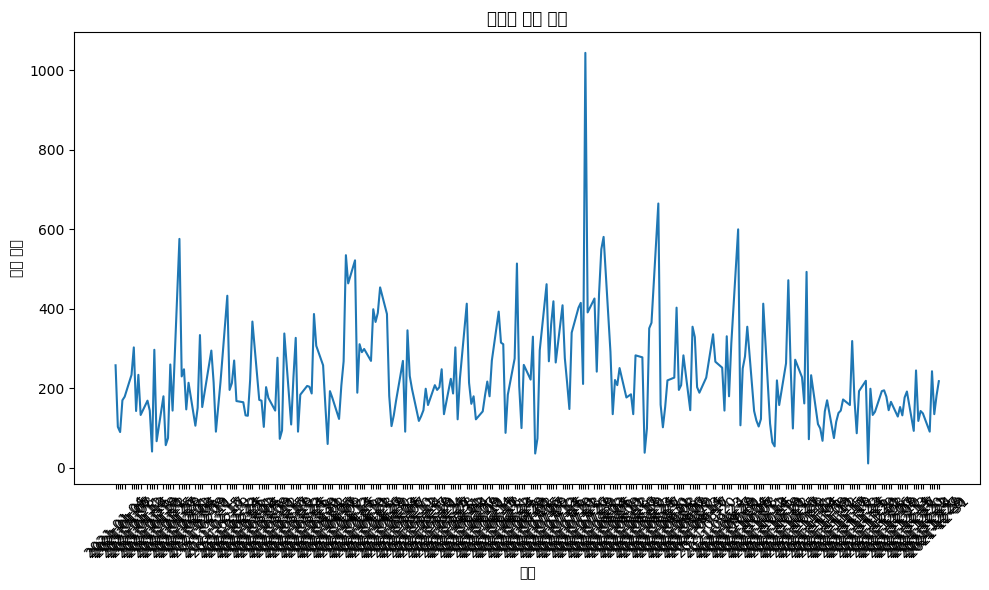

In [99]:
# 2021년 최종 판매량 그래프

import matplotlib.pyplot as plt
# 그래프 초기화
plt.figure()

dates = df1_2021['판매일']
sales_quantity = df1_2021['최종 판매수량']

# 그래프 그리기 (점을 없애고 곡선 형태로)
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(dates, sales_quantity, linestyle='-')  # 선 그래프 그리기
plt.xlabel('날짜')  # x축 레이블 설정
plt.ylabel('판매 수량')  # y축 레이블 설정
plt.title('날짜별 판매 수량')  # 그래프 제목 설정
plt.xticks(df1_2021['판매일'][::1]) # 하루단위
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()  # 그래프 표시

<ipython-input-100-80e919dd5de8>:16: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-100-80e919dd5de8>:16: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-100-80e919dd5de8>:16: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-100-80e919dd5de8>:16: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-100-80e919dd5de8>:16: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-100-80e919dd5de8>:16: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-100-80e919dd5de8>:16: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) mis

<Figure size 640x480 with 0 Axes>

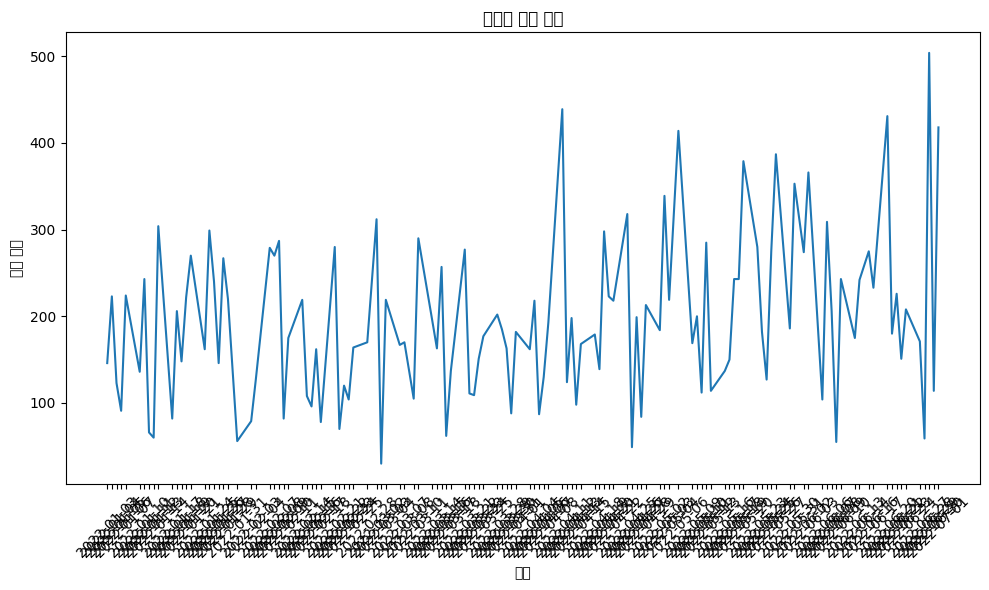

In [100]:
# 2021년 최종 판매량 그래프
# 그래프 초기화
plt.figure()

dates = df1_2022['판매일']
sales_quantity = df1_2022['최종 판매수량']

# 그래프 그리기 (점을 없애고 곡선 형태로)
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(dates, sales_quantity, linestyle='-')  # 선 그래프 그리기
plt.xlabel('날짜')  # x축 레이블 설정
plt.ylabel('판매 수량')  # y축 레이블 설정
plt.title('날짜별 판매 수량')  # 그래프 제목 설정
plt.xticks(df1_2022['판매일'][::1]) # 하루단위
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()  # 그래프 표시

In [101]:
# 보기 애매해서 우선 각 월별로 다시 그래프 그려보기
df1_2021_1 = df1_2021[df1_2021['판매일'].dt.month == 1].reset_index(drop=True)
df1_2021_1

,판매일,판매수량_df0,판매수량_df1,최종 판매수량
0,2021-01-04,258,0.0,258.0
1,2021-01-05,103,0.0,103.0
2,2021-01-06,102,12.0,90.0
3,2021-01-07,170,0.0,170.0
4,2021-01-08,179,0.0,179.0
5,2021-01-11,234,0.0,234.0
6,2021-01-12,303,0.0,303.0
7,2021-01-13,143,0.0,143.0
8,2021-01-14,234,0.0,234.0
9,2021-01-15,133,0.0,133.0


<ipython-input-102-852925a4e78b>:16: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-102-852925a4e78b>:16: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-102-852925a4e78b>:16: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-102-852925a4e78b>:16: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-102-852925a4e78b>:16: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-102-852925a4e78b>:16: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()  # 그래프 레이아웃 조정
<ipython-input-102-852925a4e78b>:16: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) mis

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

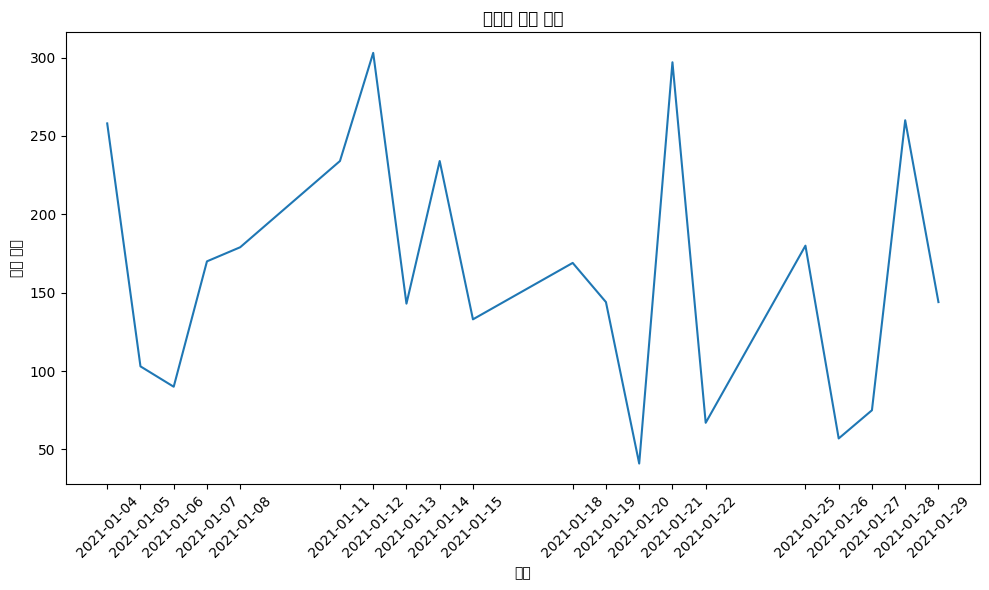

In [102]:
# 2021년 1월 최종 판매량 그래프
# 그래프 초기화
plt.figure()

dates = df1_2021_1['판매일']
sales_quantity = df1_2021_1['최종 판매수량']

# 그래프 그리기 (점을 없애고 곡선 형태로)
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(dates, sales_quantity, linestyle='-')  # 선 그래프 그리기
plt.xlabel('날짜')  # x축 레이블 설정
plt.ylabel('판매 수량')  # y축 레이블 설정
plt.title('날짜별 판매 수량')  # 그래프 제목 설정
plt.xticks(df1_2021_1['판매일'][::1]) # 하루단위
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()  # 그래프 표시

In [103]:
df1_2021

,판매일,판매수량_df0,판매수량_df1,최종 판매수량
0,2021-01-04,258,0.0,258.0
1,2021-01-05,103,0.0,103.0
2,2021-01-06,102,12.0,90.0
3,2021-01-07,170,0.0,170.0
4,2021-01-08,179,0.0,179.0
...,...,...,...,...
251,2021-12-27,91,0.0,91.0
252,2021-12-28,243,0.0,243.0
253,2021-12-29,135,0.0,135.0
254,2021-12-30,182,0.0,182.0


In [104]:
merged_df1

,판매일,판매수량_df0,판매수량_df1,최종 판매수량
0,2021-01-04,258,0.0,258.0
1,2021-01-05,103,0.0,103.0
2,2021-01-06,102,12.0,90.0
3,2021-01-07,170,0.0,170.0
4,2021-01-08,179,0.0,179.0
...,...,...,...,...
375,2022-06-27,171,0.0,171.0
376,2022-06-28,59,0.0,59.0
377,2022-06-29,504,0.0,504.0
378,2022-06-30,114,0.0,114.0


In [114]:
df_500 = df[df['상품 바코드'] == 8809274240066]

In [113]:
merged_df1

,판매일,판매수량_df0,판매수량_df1,최종 판매수량
0,2021-01-04,258,0.0,258.0
1,2021-01-05,103,0.0,103.0
2,2021-01-06,102,12.0,90.0
3,2021-01-07,170,0.0,170.0
4,2021-01-08,179,0.0,179.0
...,...,...,...,...
375,2022-06-27,171,0.0,171.0
376,2022-06-28,59,0.0,59.0
377,2022-06-29,504,0.0,504.0
378,2022-06-30,114,0.0,114.0


In [116]:
# 날짜 별로 판매수량 더하기
df_true = df_500[df_500['구분']=='매출'][['판매일','판매수량']]

df_false = df_500[df_500['구분']=='반품'][['판매일','판매수량']]

# 매출
df_sum_by_date_0 = df_true.groupby('판매일').sum()
df_sum_by_date_0 = df_sum_by_date_0.reset_index()

# 일별 반품 총합
df_sum_by_date_1 = df_false.groupby('판매일').sum()
df_sum_by_date_1 = df_sum_by_date_1.reset_index()

# 반품/매출 데이터프레임 합치기
merged_df500 = pd.merge(df_sum_by_date_0, df_sum_by_date_1, on='판매일', suffixes=('_매출', '_반품'), how='left')

# 비어있는 값 채워줘야함
# 숫자 - null = null
merged_df500.fillna(0,inplace=True)

# 최종판매수량
merged_df500['최종 판매수량'] = merged_df500['판매수량_매출'] - merged_df500['판매수량_반품']


In [117]:
merged_df500

,판매일,판매수량_매출,판매수량_반품,최종 판매수량
0,2021-01-04,17,0.0,17.0
1,2021-01-05,18,0.0,18.0
2,2021-01-06,38,20.0,18.0
3,2021-01-07,60,0.0,60.0
4,2021-01-08,126,0.0,126.0
...,...,...,...,...
359,2022-06-10,31,0.0,31.0
360,2022-06-16,10,0.0,10.0
361,2022-06-20,12,0.0,12.0
362,2022-06-21,96,0.0,96.0


In [118]:
merged_df1

,판매일,판매수량_df0,판매수량_df1,최종 판매수량
0,2021-01-04,258,0.0,258.0
1,2021-01-05,103,0.0,103.0
2,2021-01-06,102,12.0,90.0
3,2021-01-07,170,0.0,170.0
4,2021-01-08,179,0.0,179.0
...,...,...,...,...
375,2022-06-27,171,0.0,171.0
376,2022-06-28,59,0.0,59.0
377,2022-06-29,504,0.0,504.0
378,2022-06-30,114,0.0,114.0


In [119]:
merged_df_new = pd.merge(merged_df1, merged_df500, on='판매일', suffixes=('_df1', '_df5060'), how='left')
merged_df_new

,판매일,판매수량_df0,판매수량_df1,최종 판매수량_df1,판매수량_매출,판매수량_반품,최종 판매수량_df500
0,2021-01-04,258,0.0,258.0,17.0,0.0,17.0
1,2021-01-05,103,0.0,103.0,18.0,0.0,18.0
2,2021-01-06,102,12.0,90.0,38.0,20.0,18.0
3,2021-01-07,170,0.0,170.0,60.0,0.0,60.0
4,2021-01-08,179,0.0,179.0,126.0,0.0,126.0
...,...,...,...,...,...,...,...
375,2022-06-27,171,0.0,171.0,NaN,NaN,NaN
376,2022-06-28,59,0.0,59.0,NaN,NaN,NaN
377,2022-06-29,504,0.0,504.0,NaN,NaN,NaN
378,2022-06-30,114,0.0,114.0,NaN,NaN,NaN


In [122]:
merged_df_new.fillna(0,inplace=True)

In [71]:
# lstm으로 예측

In [120]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

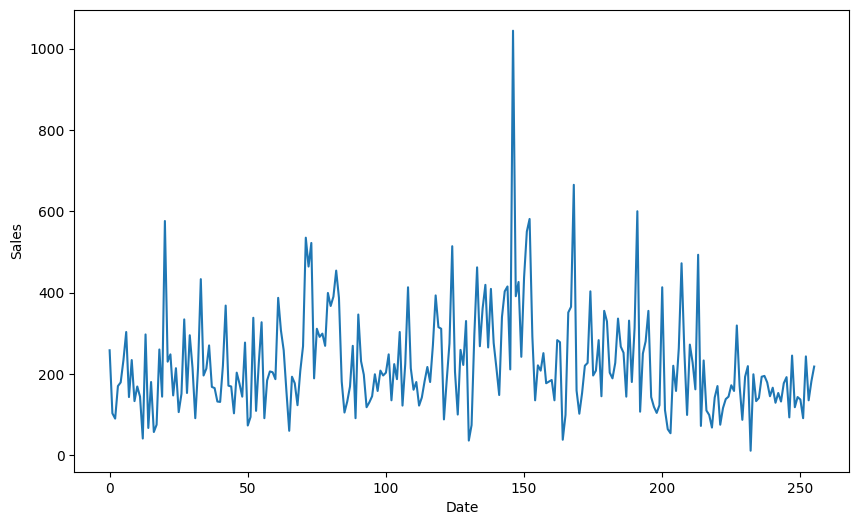

In [73]:
# 데이터 시각화
df1_2021['최종 판매수량'].plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [124]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# 데이터 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df_new['최종 판매수량_df1'].values.reshape(-1, 1))

# 다른 변수 스케일링 (새로운 변수 추가)
scaler_other = MinMaxScaler()
other_variable = merged_df_new['최종 판매수량_df500'].values.reshape(-1, 1)
scaled_other_variable = scaler_other.fit_transform(other_variable)

# 기존 X 데이터와 새로운 변수를 합침
look_back = 7  # 7일 전 데이터를 기반으로 다음날을 예측
X, y = [], []

for i in range(len(scaled_data) - look_back):
    X.append(np.hstack((scaled_data[i:i+look_back], scaled_other_variable[i:i+look_back])))
    y.append(scaled_data[i+look_back])


X = np.array(X)
y = np.array(y)

# 훈련 데이터와 검증 데이터 분할
train_size = int(0.8 * len(X))
X_train, X_valid = X[:train_size], X[train_size:]
y_train, y_valid = y[:train_size], y[train_size:]

# 모델 생성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 2)))  # look_back+1로 입력 차원 수정
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_valid, y_valid), verbose=1)



Epoch 1/50
19/19 [==============================] - 3s 36ms/step - loss: 0.0440 - val_loss: 0.0187
Epoch 2/50
19/19 [==============================] - 0s 12ms/step - loss: 0.0161 - val_loss: 0.0107
Epoch 3/50
19/19 [==============================] - 0s 12ms/step - loss: 0.0133 - val_loss: 0.0096
Epoch 4/50
19/19 [==============================] - 0s 12ms/step - loss: 0.0127 - val_loss: 0.0096
Epoch 5/50
19/19 [==============================] - 0s 12ms/step - loss: 0.0126 - val_loss: 0.0097
Epoch 6/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0129 - val_loss: 0.0097
Epoch 7/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0126 - val_loss: 0.0097
Epoch 8/50
19/19 [==============================] - 0s 15ms/step - loss: 0.0126 - val_loss: 0.0097
Epoch 9/50
19/19 [==============================] - 0s 15ms/step - loss: 0.0127 - val_loss: 0.0097
Epoch 10/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0125 - val_loss: 0.0098
Epoch 11/

3/3 [==============================] - 0s 6ms/step


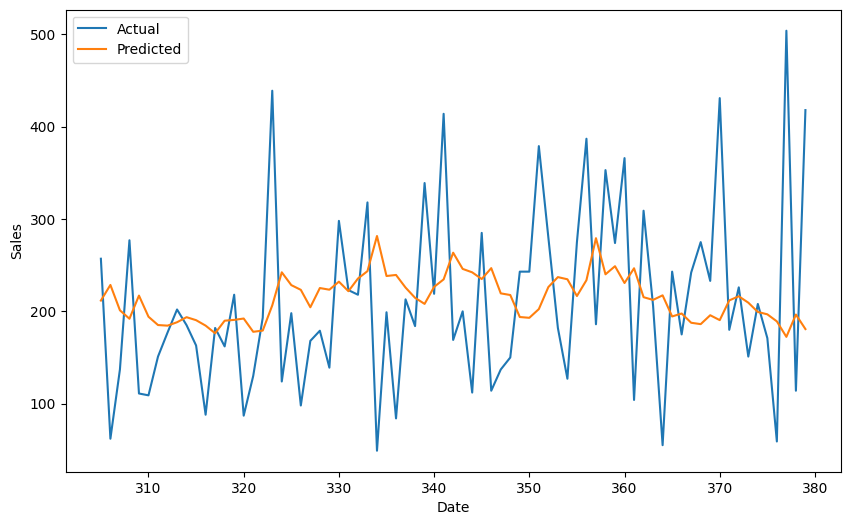

In [125]:
# 검증 데이터에 대한 예측
y_pred = model.predict(X_valid)

# 예측 결과 역스케일링
y_pred = scaler.inverse_transform(y_pred)
y_valid = scaler.inverse_transform(y_valid)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(merged_df_new['최종 판매수량_df1'].index[train_size + look_back:], y_valid, label='Actual')
plt.plot(merged_df_new['최종 판매수량_df1'].index[train_size + look_back:], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [77]:
# 판매수량 말고도 다른 변수 추가 필요함
# ex) 주말여부/

In [78]:
A = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]

In [79]:
for i in A:
 print(i)

            판매일  구분     우편번호  판매수량 옵션코드  규격  입수        상품 바코드           상품명  \
0    2021-01-04  매출    37575     3   CS  6입   6  8.809274e+12  가야산천년수<2L*6>   
1    2021-01-04  매출    37611    10   CS  6입   6  8.809274e+12  가야산천년수<2L*6>   
2    2021-01-04  매출    37741     5   CS  6입   6  8.809274e+12  가야산천년수<2L*6>   
3    2021-01-04  매출  377-65     15   CS  6입   6  8.809274e+12  가야산천년수<2L*6>   
4    2021-01-04  매출    37767   160   CS  6입   6  8.809274e+12  가야산천년수<2L*6>   
...         ...  ..      ...   ...  ...  ..  ..           ...           ...   
5936 2022-07-01  매출    37928    10   CS  6입   6  8.809274e+12  가야산천년수<2L*6>   
5937 2022-07-01  매출    37930     3   CS  6입   6  8.809274e+12  가야산천년수<2L*6>   
5938 2022-07-01  매출    38004    10   CS  6입   6  8.809274e+12  가야산천년수<2L*6>   
5939 2022-07-01  매출    38039    10   CS  6입   6  8.809274e+12  가야산천년수<2L*6>   
5940 2022-07-01  매출    37924     8   CS  6입   6  8.809274e+12  가야산천년수<2L*6>   

      Unnamed: 9  Unnamed: 10  
0            NaN   

In [80]:
import pandas as pd

# 여러 데이터프레임을 리스트로 관리
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

# 반복문을 사용하여 각 데이터프레임에 대해 전처리 작업 수행
merged_dfs = []  # 전처리된 결과를 저장할 리스트

for df in dfs:
    df_true = df[df['구분'] == '매출'][['판매일', '판매수량']]
    df_false = df[df['구분'] == '반품'][['판매일', '판매수량']]

    df_sum_by_date_0 = df_true.groupby('판매일').sum().reset_index()
    df_sum_by_date_1 = df_false.groupby('판매일').sum().reset_index()

    merged_df = pd.merge(df_sum_by_date_0, df_sum_by_date_1, on='판매일', suffixes=('_df0', '_df1'), how='left')
    merged_df.fillna(0, inplace=True)
    merged_df['최종 판매수량'] = merged_df['판매수량_df0'] - merged_df['판매수량_df1']

    merged_dfs.append(merged_df)

# merged_dfs 리스트에 각 데이터프레임의 전처리 결과가 저장됨



In [81]:
merged_dfs[0].to_excel('teeest.xlsx')

In [82]:
merged_dfs

[           판매일  판매수량_df0  판매수량_df1  최종 판매수량
 0   2021-01-04       258       0.0    258.0
 1   2021-01-05       103       0.0    103.0
 2   2021-01-06       102      12.0     90.0
 3   2021-01-07       170       0.0    170.0
 4   2021-01-08       179       0.0    179.0
 ..         ...       ...       ...      ...
 375 2022-06-27       171       0.0    171.0
 376 2022-06-28        59       0.0     59.0
 377 2022-06-29       504       0.0    504.0
 378 2022-06-30       114       0.0    114.0
 379 2022-07-01       418       0.0    418.0
 
 [380 rows x 4 columns],
            판매일  판매수량_df0  판매수량_df1  최종 판매수량
 0   2021-01-04       108       0.0    108.0
 1   2021-01-05        55       0.0     55.0
 2   2021-01-06        31       0.0     31.0
 3   2021-01-07         9       0.0      9.0
 4   2021-01-08        57       0.0     57.0
 ..         ...       ...       ...      ...
 357 2022-06-27        13       0.0     13.0
 358 2022-06-28         3       0.0      3.0
 359 2022-06-29        90   